In [2]:
import sys
!conda install --yes --prefix {sys.prefix} requests
!conda install --yes --prefix {sys.prefix} bs4

import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



# Research Question(s)

How do the value of F1 racers compare to their compensation? And from this, which players are economically undervalued and which are overvalued?


# Data Collection and Cleaning

## Data Collection Description
Our data collection consisted of two components. First, we scrapped the official formula1.com website for official race results. Using BeautifulSoup, we coded a for loop to parse through individual driver result datasets and overall race result datasets from 1950 to 2021, storing driver and race results in two separate dataframes over 1,000 rows each. We also utilized this for loop to add a ‘Year’ column to attach the year the race occurred for every row to help with connecting the results to the salary data later. This BeautifulSoup for loop was sufficient to convert the results data into DataFrames. Secondly, with the results data established, we had to pull in corresponding salary data to determine how salaries correlated with individual and race performance. Unfortunately, this data is not officially published, and no one website contained data for all years. Thus, we had to parse through the internet, collecting data on salaries from 2021 to 2010 from various sites and compiling the information into a CSV, which was then loaded into Python.  

## Additional Data Curation/Cleaning
With our three datasets established, we then had to clean each to ensure that the data would be ready for analysis and that the data frames could be merged. Firstly, the two datasets created using BeautifulSoup pulled in multiple ‘Unnamed’ columns, so we dropped these columns and set the dataframes equal to the columns we wanted to conduct analysis on. Importantly, the BeautifulSoup code also had difficulty parsing driver names with special symbols. For example, Kimi Räikkönen was pulled in as RÃ¤ikkÃ¶nen. So, we parsed through both result dataframes and replaced names that were incorrectly translated to their english version, so for Kimi, we replaced RÃ¤ikkÃ¶nen with “Raikkonen”. Additionally, in order to merge results with the salary table, we had to ensure that driver names were exact matches, so we also parsed through all names in each table and replaced all double spaces with single spaces and trimmed any additional white space that may have been brought in. In all datasets, all numerical values were pulled in as numeric, so no transformation or cleaning was needed.

With this cleaning completed, we then successfully merged our result tables with our salary tables using an inner join on driver name and year to ensure that we accurately represented the salary a driver was earning the year their result was recorded. Additionally, we added a column to our analysis to represent the driver’s “cost per point” by dividing the salary column by the points column. This created issues for drivers with 0 points creating inf values, so we had to ensure that we dropped all inf values from this table. 

## Data Collection Code:

In [21]:
salary_url = 'https://drive.google.com/file/d/1AG_ReOXKGeYSe2WhPk1Q2_G96wGR1GdT/view?usp=sharing'
driver_url = 'https://drive.google.com/file/d/1SxJfQf2UFY2YmQ7VMpbJT9DMCBVgDd2i/view?usp=sharing'
race_url = 'https://drive.google.com/file/d/14Pd84yn97UWAaVrdAkz3WsihVeUwDj2G/view?usp=sharing'

salary_url2='https://drive.google.com/uc?id=' + salary_url.split('/')[-2]
driver_url2='https://drive.google.com/uc?id=' + driver_url.split('/')[-2]
race_url2='https://drive.google.com/uc?id=' + race_url.split('/')[-2]

salary_df = pd.read_csv(salary_url2,encoding='windows-1252')
driver_df = pd.read_csv(driver_url2)
race_df = pd.read_csv(url2)

In [22]:
#data cleaning
driver_df = driver_df[['Pos','Driver','Nationality','Car','PTS','Year']]
race_df = race_df[['Grand Prix','Date','Winner','Car','Laps','Time','Year']]

driver_df['Driver'] = driver_df['Driver'].str.rsplit(' ',1).str[0]
driver_df['Driver'] = driver_df['Driver'].str.replace('  ', ' ')
driver_df['Driver'] = driver_df['Driver'].str.replace('   ', ' ')
driver_df['Driver'] = driver_df['Driver'].str.replace('RÃ¤ikkÃ¶nen','Raikkonen')
race_df['Winner'] = race_df['Winner'].str.rsplit(' ',1).str[0]

In [24]:
#merging tables
results_by_salary= salary_df.merge(driver_df,on=['Driver','Year'])

In [37]:
#adding column for cost per point (CPP) by player
results_by_salary['CPP'] = results_by_salary['Salary']/results_by_salary['PTS']
CPP_df = results_by_salary[results_by_salary['CPP']!=np.inf]
CPP_df = CPP_df.dropna()

len(CPP_df)

185

# Data Description

## Motivation
This dataset was created as part of a final project for the Introductory Data Science course, INFO 2950, at Cornell University to analyze the value of individual F1 racers through data analysis. The dataset was created by Ashton O’Connor and Quimey Moure, students in the course, on behalf of Cornell University. The dataset was created for free and as part of a course assignment. 

## Composition
In our dataset, observations (rows) are individual occurrences of a racer’s result at a race. Each row can be identified by a combination of the driver’s name and racing year as a composite key. The attributes (columns) describe the performance and corresponding salary of the driver, specifically measuring position, points, year of the race, and salary earned for that year. For our individual driver data, our dataset contains 1,596 instances, while our dataset for race data contains 1,054 instances and for salaries contains 250 observations. Due to the absence of salary data, our final dataset contains 208 rows as a result of the inner join.

Both our race results contain all possible instances of recorded F1 racing data as they are scrapped from the official F1 website. However, due to the confidentiality of driver salaries, our salary data and resulting merged table only contain a sample of driver results with corresponding salaries. 

## Collection Process
The nature of F1 racing and the data collected on results enabled us to collect the entire population of F1 data from the official website through simple web scraping. However, since our project is focused on the connection between performance and pay, the availability of salary data for individual drivers, especially for those that are not highly popular or for those going back beyond 2010 limited the data that we could observe and record. Most websites containing information on salaries only had salary information for the top ten drivers at the time, and were often rough estimates. 

## Preprocessing
The official data for race results was collected by F1 and uploaded to the formula1 website in an easily digestible format, which allowed us to simply copy the datasets from the website and append all data to one large frame. In order to compile salary data however, the majority of information was based upon inside sources that had published data on popular players online. We scraped the web and compiled a CSV from various websites by year for driver salary data.

## Uses
Our raw data can be found on this Google Drive. Please reach out to Quimey Moure (qem2) or Ashton O’Connor (amo85) with any issues accessing the link. 
This dataset has so far been used to conduct initial exploratory data analysis, detailed below, which was used to inform our research question and future goals for our analysis. 


# Data Limitations

# Exploratory Data Analysis

In [32]:
#summary statistics:

#average salary
avg_salary = results_by_salary['Salary'].mean()
#average points
avg_pts = results_by_salary['PTS'].mean()

#average cost per point (CPP)
avg_cpp = CPP_df['CPP'].mean()

print("Average Salary: ","$",round(avg_salary,2))
print("Average PTS: ",round(avg_pts,2))
print("Average Cost per Point: ","$",round(avg_cpp,2))
print("Highest Salary: ","$",max(results_by_salary['Salary']))

Average Salary:  $ 9287661.96
Average PTS:  96.9
Average Cost per Point:  $ 223139.42
Highest Salary:  $ 76000000


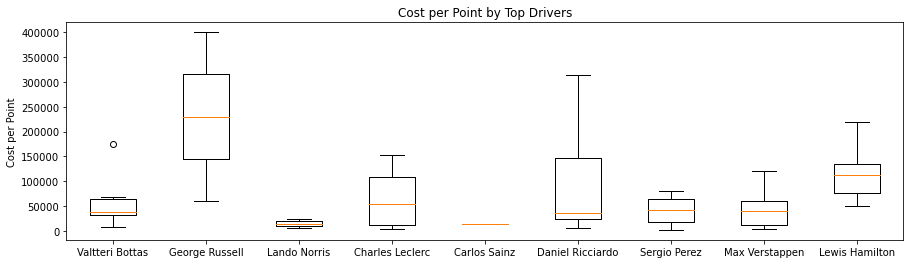

In [29]:
#top ten racers' CPPS
vb = CPP_df[CPP_df['Driver']=='Valtteri Bottas']
gr = CPP_df[CPP_df['Driver']=='George Russell']
ln = CPP_df[CPP_df['Driver']=='Lando Norris']
cl = CPP_df[CPP_df['Driver']=='Charles Leclerc']
cs = CPP_df[CPP_df['Driver']=='Carlos Sainz']
dr = CPP_df[CPP_df['Driver']=='Daniel Ricciardo']
sp = CPP_df[CPP_df['Driver']=='Sergio Perez']
mv = CPP_df[CPP_df['Driver']=='Max Verstappen']
lh = CPP_df[CPP_df['Driver']=='Lewis Hamilton']
plt.rcParams["figure.figsize"] = [15, 4]
plt.boxplot([vb['CPP'], gr['CPP'],ln['CPP'],cl['CPP'],cs['CPP'],dr['CPP'],sp['CPP'],mv['CPP'],lh['CPP']])
driver_labels = ('Valtteri Bottas','George Russell','Lando Norris','Charles Leclerc','Carlos Sainz','Daniel Ricciardo',
          'Sergio Perez','Max Verstappen','Lewis Hamilton')
plt.xticks(np.arange(len(driver_labels))+1,driver_labels)
plt.ylabel('Cost per Point')
plt.title("Cost per Point by Top Drivers")
plt.show()

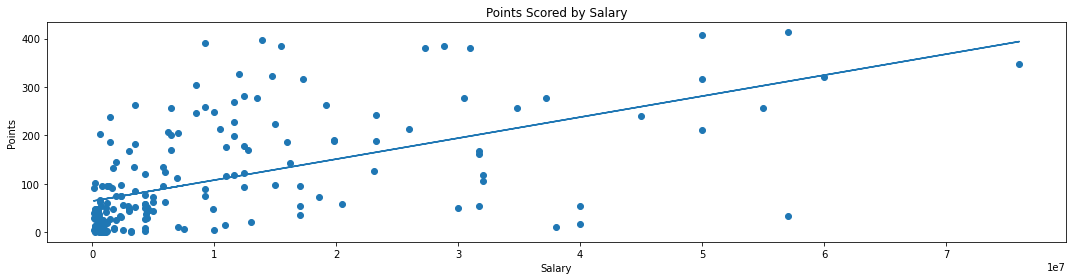

Linear Regression Equation: [4.33698439e-06] *x + 64.45


In [36]:
#regression model of how salary impacts the points a driver earns

x=CPP_df[['Salary']]
y=CPP_df['PTS']
plt.scatter(x,y)

#fit regression
regressor = LinearRegression()
regressor.fit(x,y)
ypred = regressor.predict(CPP_df[['Salary']])

#plot regression
plt.plot(x,regressor.coef_*x + regressor.intercept_)
plt.xlabel('Salary')
plt.ylabel('Points')
plt.title('Points Scored by Salary')
plt.tight_layout()

plt.show()
print("Linear Regression Equation:",regressor.coef_,"*x +",round(regressor.intercept_,2))

In [ ]:
#Questions: is this how i show analysis?
#are we actually supposed to be bringing in the data?
#is 208 enough datapoints?